In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

In [2]:
import riskModelValuation as model

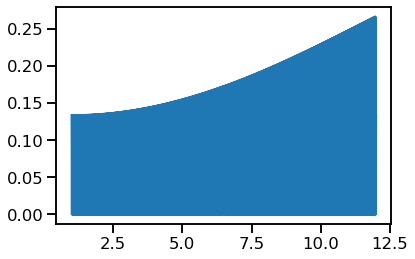

In [3]:
plt.plot(model.ori_to_val_dist(model.stim_grid, model.prior_ori(model.stim_grid), type = "prior")[0], model.ori_to_val_dist(model.stim_grid, model.prior_ori(model.stim_grid), type = "linearPrior")[1])
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")


In [4]:
theta0 = 0.01*np.pi#np.linspace(0.001, 0.25*np.pi, 3)

In [5]:
val_noise = model.stimulus_val_noise(x = theta0, sd = 0.005*np.pi, grid = model.stim_grid, type = "linearPrior")

(1000, 300)

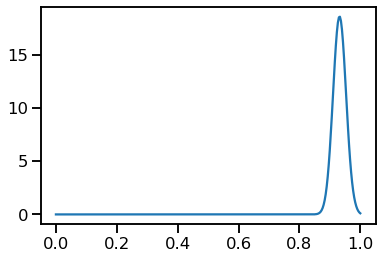

In [6]:
sigma_stim = 0.01
sigma_rep = 0.01
sd = 0.001
    
p_m_given_val0, p_m_given_val = model.value_efficient_encoding(theta0, sigma_stim, sigma_rep, type = "prior")
plt.plot(model.rep_grid,p_m_given_val0[0,:])
np.shape(p_m_given_val)

In [7]:
model.experiment

'bothSideTruncated'

In [8]:
np.shape(np.unique(model.value_function_ori(model.stim_grid, "linearPrior")))

(929,)

In [9]:
val_grid = model.value_function_ori(model.stim_grid, type="linearPrior")
val_centers, val_prior = model.prior_val(model.stim_grid, type="linearPrior")
p_m_given_val0, p_m_given_val = model.value_efficient_encoding(theta0, sigma_stim, sigma_rep, type="linearPrior")
p_val_given_m = p_m_given_val * val_prior[:, np.newaxis]

In [10]:
theta0 = 0.28*np.pi#np.linspace(0.001, 0.25*np.pi, 3)

In [11]:
val_centers, p_value_est_given_val0  = model.value_bayesian_decoding(theta0, sigma_stim, sigma_rep, type="linearPrior")

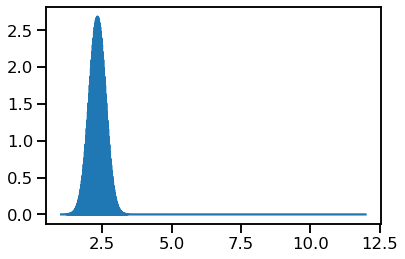

In [12]:
plt.plot(val_centers, p_value_est_given_val0)

In [13]:
rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type="linearPrior")
risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob=0.75, type="linearPrior") 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
# p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
np.shape(safe_value)

(1000,)

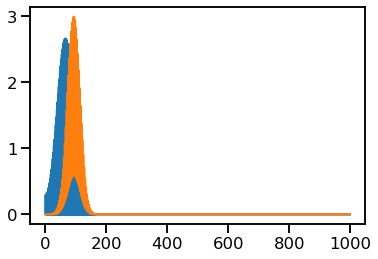

In [14]:
plt.plot(safe_prob)
plt.plot(risky_prob[4,:])

In [15]:
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=0)
np.shape(risky_prob)
# np.shape(cdf2)
# np.shape(risky_prob*cdf2)

(5, 1000)

In [16]:
prob = risky_prob*cdf2
# p.append(prob)
integrate.trapz(prob, safe_value)

array([0.12105959, 0.24952842, 0.42628538, 0.61948198, 0.78651048])

In [17]:
model.diff_dist(safe_value, risky_prob, safe_prob)

array([[0.12105959, 0.24952842, 0.42628538, 0.61948198, 0.78651048]])

# linear prior

In [18]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001



In [21]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"   
    
    risky_rep = 1.0*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(22.5/180., 13/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [22]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))



interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

# Inverse Linear prior

In [ ]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001



In [24]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"   
    
    risky_rep = 1.0*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(13/180., 22.5/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [25]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))




interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

# More linear prior

In [18]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [19]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [20]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"

    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [21]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [22]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [23]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [24]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [25]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>